In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
from io import BytesIO

from plotnine import *
from mizani.formatters import comma_format, percent_format

In [3]:
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

In [4]:
start_date = "2000-01-01"
end_date = "2024-12-31"

In [5]:
import os
import boto3
from botocore.client import Config

class DatacoreConnection:
    """
    Connection handler for Datacore's MinIO-based storage system.
    
    This class manages authentication and provides methods for
    accessing financial datasets stored in Datacore's cloud infrastructure.
    
    Attributes
    ----------
    s3 : boto3.client
        S3-compatible client for interacting with Datacore storage
    """
    
    def __init__(self):
        """Initialize connection using environment variables."""
        self.MINIO_ENDPOINT = os.environ["MINIO_ENDPOINT"]
        self.MINIO_ACCESS_KEY = os.environ["MINIO_ACCESS_KEY"]
        self.MINIO_SECRET_KEY = os.environ["MINIO_SECRET_KEY"]
        self.REGION = os.getenv("MINIO_REGION", "us-east-1")
        
        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )
    
    def test_connection(self):
        """Verify connection by listing available buckets."""
        response = self.s3.list_buckets()
        print("Connected successfully. Available buckets:")
        for bucket in response.get("Buckets", []):
            print(f"  - {bucket['Name']}")
    
    def list_objects(self, bucket_name, prefix=""):
        """List objects in a bucket with optional prefix filter."""
        response = self.s3.list_objects_v2(
            Bucket=bucket_name, 
            Prefix=prefix
        )
        return [obj["Key"] for obj in response.get("Contents", [])]
    
    def read_excel(self, bucket_name, key):
        """Read an Excel file from Datacore storage."""
        obj = self.s3.get_object(Bucket=bucket_name, Key=key)
        return pd.read_excel(BytesIO(obj["Body"].read()))
    
    def read_csv(self, bucket_name, key, **kwargs):
        """Read a CSV file from Datacore storage."""
        obj = self.s3.get_object(Bucket=bucket_name, Key=key)
        return pd.read_csv(BytesIO(obj["Body"].read()), **kwargs)

In [6]:
# Initialize connection
conn = DatacoreConnection()
conn.test_connection()

# Get bucket name from environment
bucket_name = os.environ["MINIO_BUCKET"]

Connected successfully. Available buckets:
  - dsteam-data
  - rawbctc


In [7]:
# Define paths to fundamentals data files
fundamentals_paths = [
    "fundamental_annual_1767674486317/fundamental_annual_1.xlsx",
    "fundamental_annual_1767674486317/fundamental_annual_2.xlsx",
    "fundamental_annual_1767674486317/fundamental_annual_3.xlsx",
]

# Download and combine all files
fundamentals_list = []
for path in fundamentals_paths:
    df_temp = conn.read_excel(bucket_name, path)
    fundamentals_list.append(df_temp)
    print(f"Downloaded: {path} ({len(df_temp):,} rows)")

df_fundamentals_raw = pd.concat(fundamentals_list, ignore_index=True)
print(f"\nTotal observations: {len(df_fundamentals_raw):,}")

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


Downloaded: fundamental_annual_1767674486317/fundamental_annual_1.xlsx (10,000 rows)


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


Downloaded: fundamental_annual_1767674486317/fundamental_annual_2.xlsx (10,000 rows)


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


Downloaded: fundamental_annual_1767674486317/fundamental_annual_3.xlsx (2,821 rows)

Total observations: 22,821


In [8]:
def clean_fundamentals(df):
    """
    Clean and standardize company fundamentals data.
    
    Parameters
    ----------
    df : pd.DataFrame
        Raw fundamentals data from Datacore
    
    Returns
    -------
    pd.DataFrame
        Cleaned fundamentals with standardized column names
    """
    df = df.copy()
    
    # Standardize identifiers
    df["symbol"] = df["symbol"].astype(str).str.upper().str.strip()
    df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
    
    # Drop rows with missing identifiers
    df = df.dropna(subset=["symbol", "year"])
    
    # Define columns that should be numeric
    numeric_columns = [
        "total_asset", "total_equity", "total_liabilities",
        "total_current_asset", "total_current_liabilities",
        "is_net_revenue", "is_cogs", "is_manage_expense",
        "is_interest_expense", "is_eat", "is_net_business_profit",
        "na_tax_deferred", "nl_tax_deferred", "e_preferred_stock",
        "capex", "total_cfo", "ca_cce", "ca_total_inventory",
        "ca_acc_receiv", "cfo_interest_expense", "basic_eps",
        "is_shareholders_eat", "cl_loan", "cl_finlease",
        "cl_due_long_debt", "nl_loan", "nl_finlease",
        "is_cos_of_sales", "e_equity"
    ]
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # Handle duplicates: keep row with most non-missing values
    df["_completeness"] = df.notna().sum(axis=1)
    df = (df
        .sort_values(["symbol", "year", "_completeness"])
        .drop_duplicates(subset=["symbol", "year"], keep="last")
        .drop(columns="_completeness")
        .reset_index(drop=True)
    )
    
    return df

df_fundamentals = clean_fundamentals(df_fundamentals_raw)
print(f"After cleaning: {len(df_fundamentals):,} firm-year observations")
print(f"Unique firms: {df_fundamentals['symbol'].nunique():,}")

After cleaning: 21,232 firm-year observations
Unique firms: 1,554


In [9]:
def create_standard_variables(df):
    """
    Create standardized financial variables for asset pricing research.
    
    This function maps Vietnamese financial statement items to standard
    variable names used in the academic finance literature, following
    conventions from Fama and French (1992, 1993, 2015).
    
    Parameters
    ----------
    df : pd.DataFrame
        Cleaned fundamentals data
    
    Returns
    -------
    pd.DataFrame
        Fundamentals with standardized variables added
    """
    df = df.copy()
    
    # Fiscal date (assume December year-end)
    df["datadate"] = pd.to_datetime(df["year"].astype(str) + "-12-31")
    
    # === Balance Sheet Items ===
    df["at"] = df["total_asset"]                    # Total assets
    df["lt"] = df["total_liabilities"]              # Total liabilities
    df["seq"] = df["total_equity"]                  # Stockholders' equity
    df["act"] = df["total_current_asset"]           # Current assets
    df["lct"] = df["total_current_liabilities"]     # Current liabilities
    
    # Common equity (fallback to total equity if not available)
    df["ceq"] = df.get("e_equity", df["seq"])
    
    # === Deferred Taxes ===
    df["txditc"] = df.get("na_tax_deferred", 0).fillna(0)  # Deferred tax assets
    df["txdb"] = df.get("nl_tax_deferred", 0).fillna(0)    # Deferred tax liab.
    df["itcb"] = 0  # Investment tax credit (rare in Vietnam)
    
    # === Preferred Stock ===
    pref = df.get("e_preferred_stock", 0)
    if isinstance(pref, pd.Series):
        pref = pref.fillna(0)
    df["pstk"] = pref
    df["pstkrv"] = pref  # Redemption value
    df["pstkl"] = pref   # Liquidating value
    
    # === Income Statement Items ===
    df["sale"] = df["is_net_revenue"]                        # Net sales/revenue
    df["cogs"] = df.get("is_cogs", 0).fillna(0)              # Cost of goods sold
    df["xsga"] = df.get("is_manage_expense", 0).fillna(0)    # SG&A expenses
    df["xint"] = df.get("is_interest_expense", 0).fillna(0)  # Interest expense
    df["ni"] = df.get("is_eat", np.nan)                      # Net income
    df["oibdp"] = df.get("is_net_business_profit", np.nan)   # Operating income
    
    # === Cash Flow Items ===
    df["oancf"] = df.get("total_cfo", np.nan)  # Operating cash flow
    df["capx"] = df.get("capex", np.nan)       # Capital expenditures
    
    return df

df_fundamentals = create_standard_variables(df_fundamentals)

In [10]:
def compute_book_equity(df):
    """
    Compute book equity following Fama-French conventions.
    
    Book equity = Stockholders' equity 
                  + Deferred taxes and investment tax credit
                  - Preferred stock
    
    Negative or zero book equity is set to missing, as book-to-market
    ratios are undefined for such firms.
    
    Parameters
    ----------
    df : pd.DataFrame
        Fundamentals with standardized variables
    
    Returns
    -------
    pd.DataFrame
        Fundamentals with book equity (be) added
    """
    df = df.copy()
    
    # Primary measure: stockholders' equity
    # Fallback 1: common equity + preferred stock
    # Fallback 2: total assets - total liabilities
    seq_measure = (df["seq"]
        .combine_first(df["ceq"] + df["pstk"])
        .combine_first(df["at"] - df["lt"])
    )
    
    # Add deferred taxes
    deferred_taxes = (df["txditc"]
        .combine_first(df["txdb"] + df["itcb"])
        .fillna(0)
    )
    
    # Subtract preferred stock (use redemption value as primary)
    preferred = (df["pstkrv"]
        .combine_first(df["pstkl"])
        .combine_first(df["pstk"])
        .fillna(0)
    )
    
    # Book equity calculation
    df["be"] = seq_measure + deferred_taxes - preferred
    
    # Set non-positive book equity to missing
    df["be"] = df["be"].where(df["be"] > 0, np.nan)
    
    return df

df_fundamentals = compute_book_equity(df_fundamentals)

# Summary statistics for book equity
print("Book Equity Summary Statistics (in million VND):")
print(df_fundamentals["be"].describe().round(2))

Book Equity Summary Statistics (in million VND):
count    2.023500e+04
mean     1.031884e+12
std      4.705269e+12
min      4.404402e+07
25%      7.267610e+10
50%      1.803885e+11
75%      5.304653e+11
max      1.836314e+14
Name: be, dtype: float64


In [11]:
def compute_profitability(df):
    """
    Compute operating profitability following Fama-French (2015).
    
    Operating profitability = (Revenue - COGS - SG&A - Interest) / Book Equity
    
    Parameters
    ----------
    df : pd.DataFrame
        Fundamentals with book equity computed
    
    Returns
    -------
    pd.DataFrame
        Fundamentals with operating profitability (op) added
    """
    df = df.copy()
    
    # Operating profit before taxes
    operating_profit = (
        df["sale"] 
        - df["cogs"].fillna(0) 
        - df["xsga"].fillna(0) 
        - df["xint"].fillna(0)
    )
    
    # Scale by book equity
    df["op"] = operating_profit / df["be"]
    
    # Winsorize extreme values (outside 1st and 99th percentiles)
    lower = df["op"].quantile(0.01)
    upper = df["op"].quantile(0.99)
    df["op"] = df["op"].clip(lower=lower, upper=upper)
    
    return df

df_fundamentals = compute_profitability(df_fundamentals)

In [12]:
def compute_investment(df):
    """
    Compute investment (asset growth) following Fama-French (2015).
    
    Investment = (Total Assets_t / Total Assets_{t-1}) - 1
    
    Parameters
    ----------
    df : pd.DataFrame
        Fundamentals data
    
    Returns
    -------
    pd.DataFrame
        Fundamentals with investment (inv) added
    """
    df = df.copy()
    
    # Create lagged assets
    df_lag = (df[["symbol", "year", "at"]]
        .assign(year=lambda x: x["year"] + 1)
        .rename(columns={"at": "at_lag"})
    )
    
    # Merge lagged values
    df = df.merge(df_lag, on=["symbol", "year"], how="left")
    
    # Compute investment (asset growth)
    df["inv"] = df["at"] / df["at_lag"] - 1
    
    # Set to missing if lagged assets non-positive
    df["inv"] = df["inv"].where(df["at_lag"] > 0, np.nan)
    
    return df

df_fundamentals = compute_investment(df_fundamentals)

In [13]:
def compute_total_debt(df):
    """
    Compute total interest-bearing debt.
    
    Total Debt = Short-term loans + Finance leases (current)
                 + Current portion of long-term debt
                 + Long-term loans + Finance leases (non-current)
    
    Parameters
    ----------
    df : pd.DataFrame
        Fundamentals data
    
    Returns
    -------
    pd.DataFrame
        Fundamentals with total_debt added
    """
    df = df.copy()
    
    df["total_debt"] = (
        df.get("cl_loan", 0).fillna(0) +           # Short-term bank loans
        df.get("cl_finlease", 0).fillna(0) +       # Current finance leases
        df.get("cl_due_long_debt", 0).fillna(0) +  # Current portion LT debt
        df.get("nl_loan", 0).fillna(0) +           # Long-term bank loans
        df.get("nl_finlease", 0).fillna(0)         # Non-current finance leases
    )
    
    return df

df_fundamentals = compute_total_debt(df_fundamentals)

In [14]:
# Keep only observations with required variables
required_vars = ["at", "lt", "seq", "sale"]
comp_vn = df_fundamentals.dropna(subset=required_vars)

# Apply quality filters
comp_vn = comp_vn.query("at > 0")      # Positive assets
comp_vn = comp_vn.query("sale >= 0")   # Non-negative sales

# Keep last observation per firm-year (in case of restatements)
comp_vn = (comp_vn
    .sort_values("datadate")
    .groupby(["symbol", "year"])
    .tail(1)
    .reset_index(drop=True)
)

# Diagnostic summary
print(f"Final sample: {len(comp_vn):,} firm-year observations")
print(f"Unique firms: {comp_vn['symbol'].nunique():,}")
print(f"Sample period: {comp_vn['year'].min()} - {comp_vn['year'].max()}")

Final sample: 20,091 firm-year observations
Unique firms: 1,502
Sample period: 1998 - 2023


In [15]:
comp_vn.to_sql(
    name="comp_vn",
    con=tidy_finance,
    if_exists="replace",
    index=False
)

print("Company fundamentals saved to database.")

Company fundamentals saved to database.


In [16]:
# Download historical price data
prices_raw = conn.read_csv(
    bucket_name,
    "historycal_price/dataset_historical_price.csv",
    low_memory=False
)

print(f"Downloaded {len(prices_raw):,} daily price observations")
print(f"Date range: {prices_raw['date'].min()} to {prices_raw['date'].max()}")

Downloaded 4,307,791 daily price observations
Date range: 2010-01-04 to 2025-05-12


In [17]:
def process_price_data(df):
    """
    Process raw price data from Datacore.
    """
    df = df.copy()
    
    # Parse dates
    df["date"] = pd.to_datetime(df["date"])
    
    # Standardize column names
    df = df.rename(columns={
        "open_price": "open",
        "high_price": "high",
        "low_price": "low",
        "close_price": "close",
        "vol_total": "volume"
    })
    
    # Compute adjusted close price
    df["adjusted_close"] = df["close"] * df["adj_ratio"]
    
    # Standardize symbol
    df["symbol"] = df["symbol"].astype(str).str.upper().str.strip()
    
    # Sort for return calculation
    df = df.sort_values(["symbol", "date"])
    
    # Add year and month
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    
    return df

prices = process_price_data(prices_raw)

In [18]:
def compute_shares_outstanding(fundamentals_df):
    """
    Compute shares outstanding from fundamentals.
    """
    shares = fundamentals_df.copy()
    shares["shrout"] = shares["is_shareholders_eat"] / shares["basic_eps"]
    shares = shares[["symbol", "year", "shrout"]].dropna()
    
    return shares

shares_outstanding = compute_shares_outstanding(df_fundamentals)

In [19]:
def add_market_cap(df, shares_df):
    """
    Add market capitalization to price data.
    """
    df = df.merge(shares_df, on=["symbol", "year"], how="left")
    
    # Compute market cap (in million VND)
    df["mktcap"] = (df["close"] * df["shrout"]) / 1_000_000
    
    # Set zero or negative market cap to missing
    df["mktcap"] = df["mktcap"].where(df["mktcap"] > 0, np.nan)
    
    return df

prices = add_market_cap(prices, shares_outstanding)

In [20]:
#| eval: false
def create_daily_dataset(df, annual_rf=0.04):
    """
    Create daily price dataset with returns and excess returns.
    """
    df = df.copy()
    
    # Sort by symbol and date (critical for correct return calculation)
    df = df.sort_values(["symbol", "date"]).reset_index(drop=True)
    
    # Remove duplicate dates within each symbol (keep last observation)
    df = df.drop_duplicates(subset=["symbol", "date"], keep="last")
    
    # Compute daily returns
    df["ret"] = df.groupby("symbol")["adjusted_close"].pct_change()
    
    # Cap extreme negative returns
    df["ret"] = df["ret"].clip(lower=-0.99)
    
    # Daily risk-free rate (assuming 252 trading days)
    df["risk_free"] = annual_rf / 252
    
    # Excess returns
    df["ret_excess"] = df["ret"] - df["risk_free"]
    df["ret_excess"] = df["ret_excess"].clip(lower=-1.0)
    
    # Lagged market cap
    df["mktcap_lag"] = df.groupby("symbol")["mktcap"].shift(1)
    
    return df

prices_daily = create_daily_dataset(prices)

In [21]:
from joblib import Parallel, delayed
import os

def process_daily_symbol(symbol_df, annual_rf=0.04):
    """
    Process a single symbol's daily data.
    """
    df = symbol_df.copy()
    
    # Sort by date (critical for correct return calculation)
    df = df.sort_values("date").reset_index(drop=True)
    
    # Remove duplicate dates (keep last observation if duplicates exist)
    df = df.drop_duplicates(subset=["date"], keep="last")
    
    # Compute daily returns
    df["ret"] = df["adjusted_close"].pct_change()

    # Replace infinite values with NaN
    df["ret"] = df["ret"].replace([np.inf, -np.inf], np.nan)
    
    # Cap extreme negative returns
    df["ret"] = df["ret"].clip(lower=-0.99)
    
    # Daily risk-free rate
    df["risk_free"] = annual_rf / 252
    
    # Excess returns
    df["ret_excess"] = df["ret"] - df["risk_free"]
    df["ret_excess"] = df["ret_excess"].clip(lower=-1.0)
    
    # Lagged market cap
    df["mktcap_lag"] = df["mktcap"].shift(1)
    
    return df

def create_daily_dataset_parallel(df, annual_rf=0.04):
    """
    Create daily price dataset using parallel processing.
    """
    # Ensure data is sorted before splitting
    df = df.sort_values(["symbol", "date"])
    
    # Split by symbol
    symbol_groups = [group for _, group in df.groupby("symbol")]
    
    n_jobs = max(1, os.cpu_count() - 1)
    print(f"Processing {len(symbol_groups):,} symbols using {n_jobs} cores...")
    
    results = Parallel(n_jobs=n_jobs, verbose=1)(
        delayed(process_daily_symbol)(group, annual_rf) 
        for group in symbol_groups
    )
    
    return pd.concat(results, ignore_index=True)

prices_daily = create_daily_dataset_parallel(prices)

# Quick validation
print("\nValidation checks:")
print(f"Any duplicate (symbol, date): {prices_daily.duplicated(subset=['symbol', 'date']).sum()}")
print(f"Sample of non-zero returns:")
print(prices_daily[prices_daily["ret"] != 0][["symbol", "date", "adjusted_close", "ret"]].head(10))


prices_daily.query("symbol == 'FPT'")[["symbol", "date", "adjusted_close", "ret"]].head(3)

Processing 1,837 symbols using 23 cores...


[Parallel(n_jobs=23)]: Using backend LokyBackend with 23 concurrent workers.


[Parallel(n_jobs=23)]: Done   4 tasks      | elapsed:    3.3s


[Parallel(n_jobs=23)]: Done 154 tasks      | elapsed:    4.7s


[Parallel(n_jobs=23)]: Done 696 tasks      | elapsed:    6.9s


[Parallel(n_jobs=23)]: Done 1837 out of 1837 | elapsed:   12.2s finished



Validation checks:


Any duplicate (symbol, date): 0
Sample of non-zero returns:


   symbol       date  adjusted_close       ret
0     A32 2018-10-23       44.574418       NaN
27    A32 2018-11-29       55.072640  0.235521
30    A32 2018-12-04       48.188560 -0.125000
43    A32 2018-12-21       51.974804  0.078571
49    A32 2019-01-02       55.072640  0.059603
53    A32 2019-01-08       50.030370 -0.091557
74    A32 2019-02-13       44.289180 -0.114754
75    A32 2019-02-14       41.008500 -0.074074
78    A32 2019-02-19       36.087480 -0.120000
91    A32 2019-03-08       41.336568  0.145455


,symbol,date,adjusted_close,ret
1146076,FPT,2010-01-04,1170.9885,NaN
1146077,FPT,2010-01-05,1170.9885,0.000000
1146078,FPT,2010-01-06,1149.6978,-0.018182


In [22]:
# Select columns
daily_columns = [
    "symbol", "date", "year", "month",
    "open", "high", "low", "close", "volume",
    "adjusted_close", "shrout", "mktcap", "mktcap_lag",
    "ret", "risk_free", "ret_excess"
]
prices_daily = prices_daily[daily_columns]

# Remove observations with missing essential variables
prices_daily = prices_daily.dropna(subset=["ret_excess", "mktcap", "mktcap_lag"])

print("Daily Return Summary Statistics:")
print(prices_daily["ret"].describe().round(4))
print(f"\nFinal daily sample: {len(prices_daily):,} observations")

Daily Return Summary Statistics:
count    3.462157e+06
mean     3.000000e-04
std      4.480000e-02
min     -9.900000e-01
25%     -4.900000e-03
50%      0.000000e+00
75%      4.000000e-03
max      3.250000e+01
Name: ret, dtype: float64

Final daily sample: 3,462,157 observations


In [23]:
#| eval: false
def create_monthly_dataset(df, annual_rf=0.04):
    """
    Create monthly price dataset with returns computed from 
    month-end to month-end adjusted prices.
    """
    df = df.copy()
    
    # Sort by symbol and date (critical for correct return calculation)
    df = df.sort_values(["symbol", "date"]).reset_index(drop=True)
    
    # Remove duplicate dates within each symbol (keep last observation)
    df = df.drop_duplicates(subset=["symbol", "date"], keep="last")
    
    # Get month-end observations
    monthly = (df
        .groupby("symbol")
        .resample("ME", on="date")
        .agg({
            "open": "first",           # First day open
            "high": "max",             # Monthly high
            "low": "min",              # Monthly low
            "close": "last",           # Last day close
            "volume": "sum",           # Total monthly volume
            "adjusted_close": "last",  # Month-end adjusted price
            "shrout": "last",          # Month-end shares outstanding
            "mktcap": "last",          # Month-end market cap
            "year": "last",
            "month": "last"
        })
        .reset_index()
    )
    
    # Remove duplicate (symbol, date) after resampling (safety check)
    monthly = monthly.drop_duplicates(subset=["symbol", "date"], keep="last")
    
    # Sort again after resampling
    monthly = monthly.sort_values(["symbol", "date"]).reset_index(drop=True)
    
    # Compute monthly returns from month-end to month-end adjusted prices
    monthly["ret"] = monthly.groupby("symbol")["adjusted_close"].pct_change()
    
    # Cap extreme returns
    monthly["ret"] = monthly["ret"].clip(lower=-0.99)
    
    # Monthly risk-free rate
    monthly["risk_free"] = annual_rf / 12
    
    # Excess returns
    monthly["ret_excess"] = monthly["ret"] - monthly["risk_free"]
    monthly["ret_excess"] = monthly["ret_excess"].clip(lower=-1.0)
    
    # Lagged market cap for portfolio weighting
    monthly["mktcap_lag"] = monthly.groupby("symbol")["mktcap"].shift(1)
    
    return monthly

prices_monthly = create_monthly_dataset(prices)

In [24]:
from joblib import Parallel, delayed
import os

def process_monthly_symbol(symbol_df, annual_rf=0.04):
    """
    Process a single symbol's data to monthly frequency.
    """
    df = symbol_df.copy()
    
    # Sort by date (critical for correct return calculation)
    df = df.sort_values("date").reset_index(drop=True)
    
    # Remove duplicate dates (keep last observation if duplicates exist)
    df = df.drop_duplicates(subset=["date"], keep="last")
    
    # Set date as index for resampling
    df = df.set_index("date")
    
    # Resample to monthly
    monthly = df.resample("ME").agg({
        "symbol": "last",
        "open": "first",
        "high": "max",
        "low": "min",
        "close": "last",
        "volume": "sum",
        "adjusted_close": "last",
        "shrout": "last",
        "mktcap": "last",
        "year": "last",
        "month": "last"
    }).reset_index()
    
    # Remove rows where symbol is NaN (months with no trading)
    monthly = monthly.dropna(subset=["symbol"])
    
    # Sort by date
    monthly = monthly.sort_values("date").reset_index(drop=True)
    
    # Compute monthly returns
    monthly["ret"] = monthly["adjusted_close"].pct_change()
    
    # Replace infinite values with NaN
    monthly["ret"] = monthly["ret"].replace([np.inf, -np.inf], np.nan)
    
    # Cap extreme returns
    monthly["ret"] = monthly["ret"].clip(lower=-0.99)
    
    # Monthly risk-free rate
    monthly["risk_free"] = annual_rf / 12
    
    # Excess returns
    monthly["ret_excess"] = monthly["ret"] - monthly["risk_free"]
    monthly["ret_excess"] = monthly["ret_excess"].clip(lower=-1.0)
    
    # Lagged market cap
    monthly["mktcap_lag"] = monthly["mktcap"].shift(1)
    
    return monthly

def create_monthly_dataset_parallel(df, annual_rf=0.04):
    """
    Create monthly price dataset using parallel processing.
    """
    # Ensure data is sorted before splitting
    df = df.sort_values(["symbol", "date"])
    
    # Split by symbol
    symbol_groups = [group for _, group in df.groupby("symbol")]
    
    n_jobs = max(1, os.cpu_count() - 1)
    print(f"Processing {len(symbol_groups):,} symbols using {n_jobs} cores...")
    
    results = Parallel(n_jobs=n_jobs, verbose=1)(
        delayed(process_monthly_symbol)(group, annual_rf) 
        for group in symbol_groups
    )
    
    return pd.concat(results, ignore_index=True)

prices_monthly = create_monthly_dataset_parallel(prices)

# Validation checks
print("\nValidation checks:")
print(f"Any duplicate (symbol, date): {prices_monthly.duplicated(subset=['symbol', 'date']).sum()}")
print(f"\nSample of non-zero returns:")
print(prices_monthly[prices_monthly["ret"] != 0][["symbol", "date", "adjusted_close", "ret"]].head(10))

prices_monthly.query("symbol == 'FPT'")[["symbol", "date", "adjusted_close", "ret"]].head(3)

Processing 1,837 symbols using 23 cores...


[Parallel(n_jobs=23)]: Using backend LokyBackend with 23 concurrent workers.
[Parallel(n_jobs=23)]: Done   4 tasks      | elapsed:    0.1s


[Parallel(n_jobs=23)]: Done 262 tasks      | elapsed:    1.7s


[Parallel(n_jobs=23)]: Done 762 tasks      | elapsed:    4.4s


[Parallel(n_jobs=23)]: Done 1462 tasks      | elapsed:    8.3s


[Parallel(n_jobs=23)]: Done 1792 out of 1837 | elapsed:   10.3s remaining:    0.3s


[Parallel(n_jobs=23)]: Done 1837 out of 1837 | elapsed:   10.5s finished



Validation checks:
Any duplicate (symbol, date): 0

Sample of non-zero returns:
   symbol       date  adjusted_close       ret
0     A32 2018-10-31       44.574418       NaN
1     A32 2018-11-30       55.072640  0.235521
2     A32 2018-12-31       51.974804 -0.056250
3     A32 2019-01-31       50.030370 -0.037411
4     A32 2019-02-28       36.087480 -0.278689
5     A32 2019-03-31       41.828670  0.159091
7     A32 2019-05-31       43.304976  0.035294
8     A32 2019-06-30       35.929125 -0.170323
9     A32 2019-07-31       37.525975  0.044444
10    A32 2019-08-31       38.324400  0.021277


,symbol,date,adjusted_close,ret
55963,FPT,2010-01-31,1092.9226,NaN
55964,FPT,2010-02-28,1107.1164,0.012987
55965,FPT,2010-03-31,1185.1823,0.070513


In [25]:
# Select columns (same structure as daily)
monthly_columns = [
    "symbol", "date", "year", "month",
    "open", "high", "low", "close", "volume",
    "adjusted_close", "shrout", "mktcap", "mktcap_lag",
    "ret", "risk_free", "ret_excess"
]
prices_monthly = prices_monthly[monthly_columns]

# Remove observations with missing essential variables
prices_monthly = prices_monthly.dropna(subset=["ret_excess", "mktcap", "mktcap_lag"])

print("Monthly Return Summary Statistics:")
print(prices_monthly["ret"].describe().round(4))
print(f"\nFinal monthly sample: {len(prices_monthly):,} observations")

Monthly Return Summary Statistics:
count    165499.0000
mean          0.0042
std           0.1862
min          -0.9900
25%          -0.0703
50%           0.0000
75%           0.0553
max          12.7500
Name: ret, dtype: float64

Final monthly sample: 165,499 observations


In [26]:
#| eval: false
prices_daily.to_sql(
    name="prices_daily",
    con=tidy_finance,
    if_exists="replace",
    index=False
)
print("Daily price data saved to database.")

prices_monthly.to_sql(
    name="prices_monthly",
    con=tidy_finance,
    if_exists="replace",
    index=False
)
print("Monthly price data saved to database.")

In [27]:
securities_over_time = (prices_monthly
    .groupby("date")
    .agg(
        n_securities=("symbol", "nunique"),
        total_mktcap=("mktcap", "sum")
    )
    .reset_index()
)

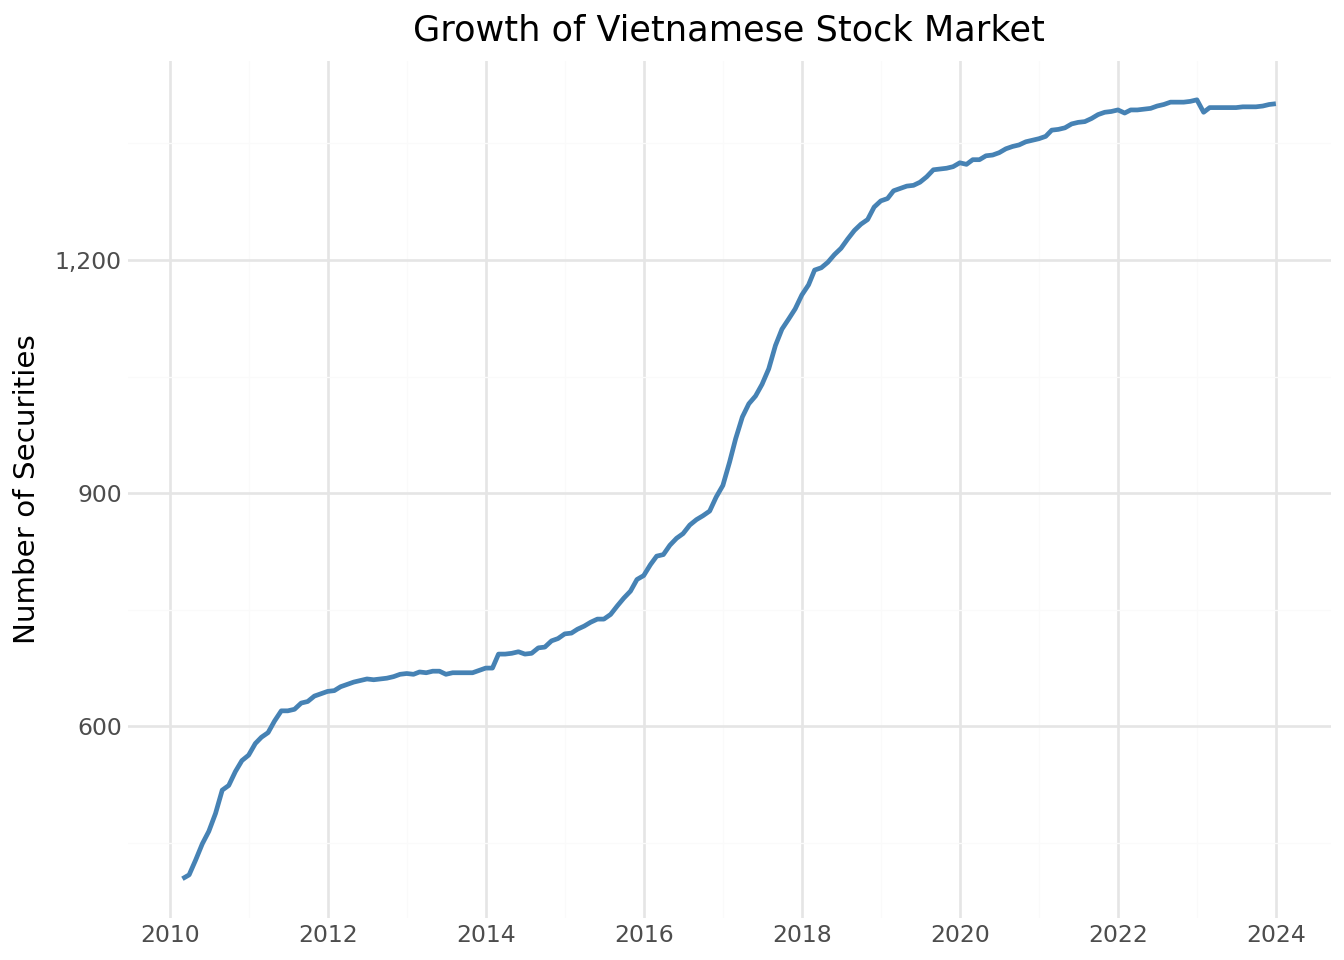

In [28]:
#| label: fig-securities-over-time
#| fig-cap: The figure shows the monthly number of securities in the Vietnamese stock market sample.
#| fig-alt: Line chart showing the growth in number of listed securities over time.
securities_figure = (
    ggplot(securities_over_time, aes(x="date", y="n_securities"))
    + geom_line(color="steelblue", size=1)
    + labs(
        x="",
        y="Number of Securities",
        title="Growth of Vietnamese Stock Market"
    )
    + scale_x_datetime(date_breaks="2 years", date_labels="%Y")
    + scale_y_continuous(labels=comma_format())
    + theme_minimal()
)
securities_figure.show()

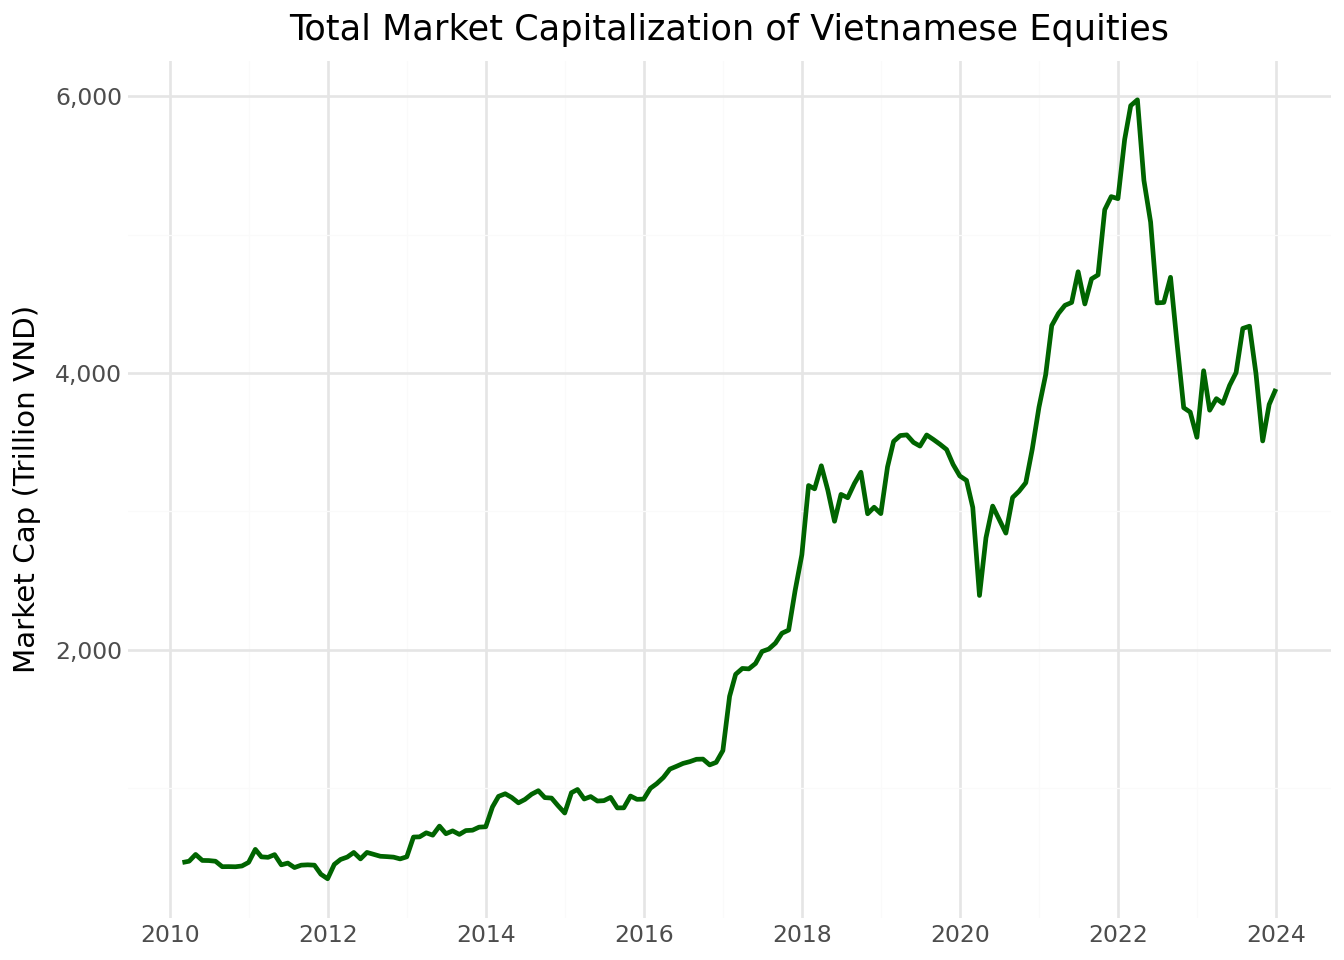

In [29]:
#| label: fig-market-cap-over-time
#| fig-cap: The figure shows the total market capitalization of Vietnamese listed companies over time.
#| fig-alt: Line chart showing total market capitalization growth.
mktcap_figure = (
    ggplot(securities_over_time, aes(x="date", y="total_mktcap / 1000"))
    + geom_line(color="darkgreen", size=1)
    + labs(
        x="",
        y="Market Cap (Trillion VND)",
        title="Total Market Capitalization of Vietnamese Equities"
    )
    + scale_x_datetime(date_breaks="2 years", date_labels="%Y")
    + scale_y_continuous(labels=comma_format())
    + theme_minimal()
)
mktcap_figure.show()

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 3264 rows containing non-finite values.
/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


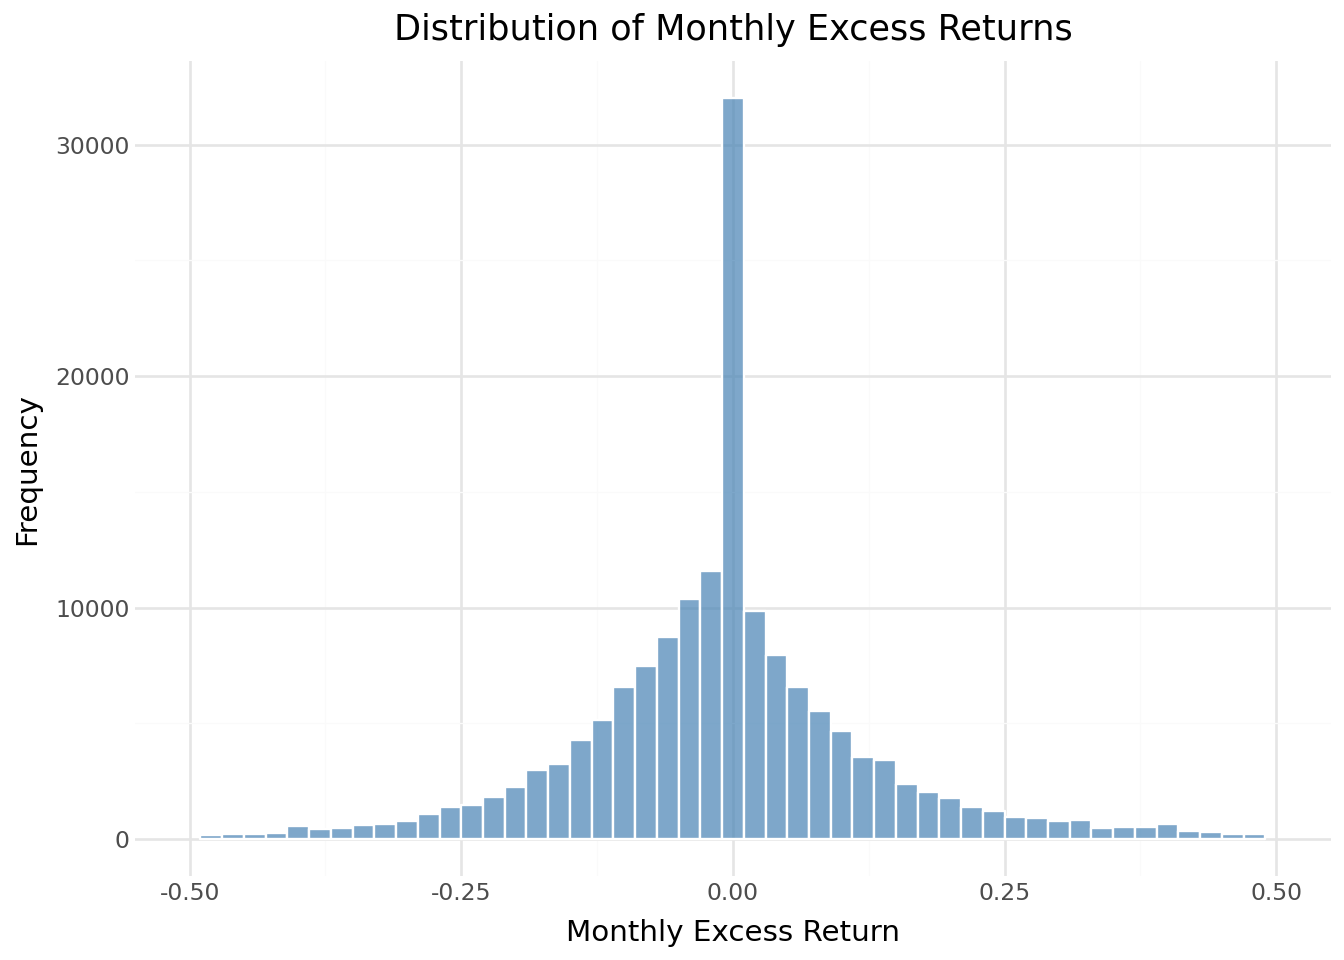

In [30]:
#| label: fig-return-distribution
#| fig-cap: Distribution of monthly excess returns for Vietnamese stocks.
#| fig-alt: Histogram showing the distribution of monthly excess returns.
return_distribution = (
    ggplot(prices_monthly, aes(x="ret_excess"))
    + geom_histogram(
        binwidth=0.02, 
        fill="steelblue", 
        color="white",
        alpha=0.7
    )
    + labs(
        x="Monthly Excess Return",
        y="Frequency",
        title="Distribution of Monthly Excess Returns"
    )
    + scale_x_continuous(limits=(-0.5, 0.5))
    + theme_minimal()
)
return_distribution.show()

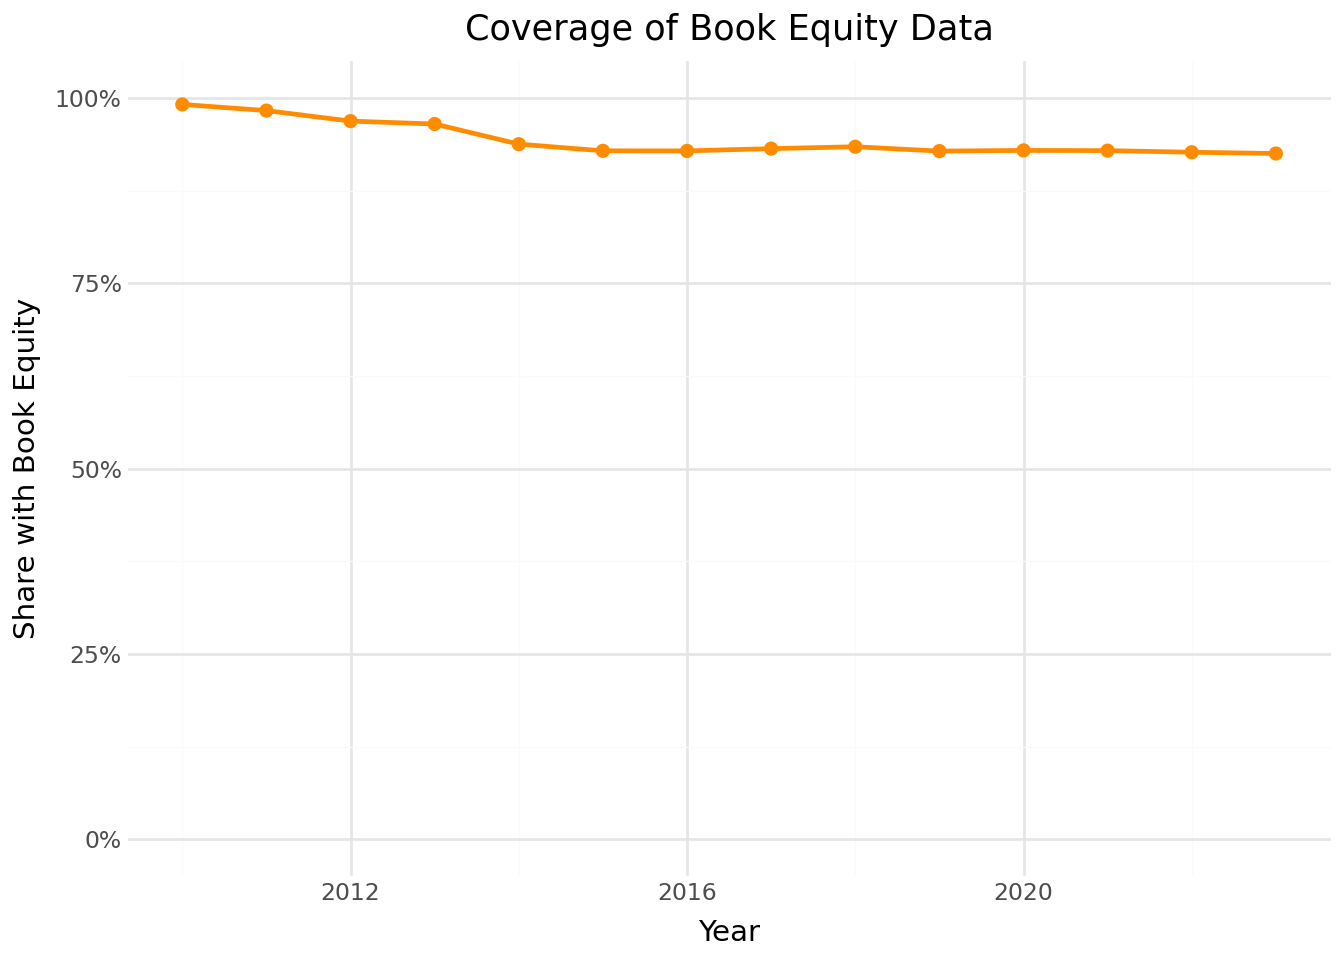

In [31]:
#| label: fig-book-equity-coverage
#| fig-cap: Share of securities with available book equity data by year.
#| fig-alt: Line chart showing the coverage of book equity data over time.
# Merge prices with fundamentals
coverage_data = (prices_monthly
    .assign(year=lambda x: x["date"].dt.year)
    .groupby(["symbol", "year"])
    .tail(1)
    .merge(comp_vn[["symbol", "year", "be"]], 
           on=["symbol", "year"], 
           how="left")
)

# Compute coverage by year
be_coverage = (coverage_data
    .groupby("year")
    .apply(lambda x: pd.Series({
        "share_with_be": x["be"].notna().mean()
    }))
    .reset_index()
)

coverage_figure = (
    ggplot(be_coverage, aes(x="year", y="share_with_be"))
    + geom_line(color="darkorange", size=1)
    + geom_point(color="darkorange", size=2)
    + labs(
        x="Year",
        y="Share with Book Equity",
        title="Coverage of Book Equity Data"
    )
    + scale_y_continuous(labels=percent_format(), limits=(0, 1))
    + theme_minimal()
)
coverage_figure.show()

In [32]:
# Example: Create merged dataset for end-of-June each year
merged_data = (prices_monthly
    .query("month == 6")
    .merge(
        comp_vn[["symbol", "year", "be", "op", "inv", "at"]],
        on=["symbol", "year"],
        how="left",
        suffixes=("", "_fundamental")
    )
)

# Convert BE from VND to BILLION VND
merged_data["be"] = merged_data["be"] / 1e9

# Compute book-to-market ratio
merged_data["bm"] = merged_data["be"] / merged_data["mktcap"]

merged_data.loc[
    (merged_data["bm"] <= 0) |
    (merged_data["bm"] > 20),
    "bm"
] = pd.NA


merged_data["bm"].describe(percentiles=[.01, .1, .5, .9, .99])

print(f"Merged observations: {len(merged_data):,}")
print(f"With book-to-market: {merged_data['bm'].notna().sum():,}")
merged_data.head(3)
merged_data.describe()
merged_data

Merged observations: 13,756
With book-to-market: 12,859


,symbol,date,year,month,open,high,low,close,volume,adjusted_close,...,mktcap,mktcap_lag,ret,risk_free,ret_excess,be,op,inv,at,bm
0,A32,2019-06-30,2019.0,6.0,26.4,26.4,21.0,22.5,3700,35.929125,...,153.000,179.52,-0.170323,0.003333,-0.173657,223.612748,0.232362,-0.072329,4.349303e+11,1.461521
1,A32,2020-06-30,2020.0,6.0,25.0,26.3,24.5,26.3,7500,38.811173,...,178.840,187.00,-0.067977,0.003333,-0.071311,242.216943,0.195565,0.122698,4.882955e+11,1.354378
2,A32,2021-06-30,2021.0,6.0,30.2,37.0,29.5,32.0,78400,45.363520,...,217.600,214.20,0.015873,0.003333,0.012540,238.385190,0.157723,0.081581,5.281309e+11,1.095520
3,A32,2022-06-30,2022.0,6.0,30.9,35.5,25.0,35.3,15200,47.503210,...,240.040,210.12,0.142395,0.003333,0.139061,215.399735,0.172085,0.036584,5.474523e+11,0.897349
4,A32,2023-06-30,2023.0,6.0,30.1,33.5,29.2,29.4,2400,35.064204,...,199.920,204.68,-0.023256,0.003333,-0.026589,222.024135,0.174658,-0.076752,5.054342e+11,1.110565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13751,YTC,2019-06-30,2019.0,6.0,70.0,79.9,70.0,79.9,38900,171.451817,...,246.092,215.60,0.141429,0.003333,0.138095,59.901389,0.738190,-0.021758,7.521980e+11,0.243411
13752,YTC,2020-06-30,2020.0,6.0,88.5,88.5,77.0,87.0,150640,180.966960,...,267.960,272.58,-0.016949,0.003333,-0.020282,13.459082,-0.458548,0.323501,9.955348e+11,0.050228
13753,YTC,2021-06-30,2021.0,6.0,76.0,115.5,61.0,61.0,34100,126.884880,...,187.880,234.08,-0.197368,0.003333,-0.200702,21.746595,0.539521,-0.215694,7.808035e+11,0.115747
13754,YTC,2022-06-30,2022.0,6.0,68.0,68.0,65.0,65.5,200,136.245240,...,201.740,209.44,-0.036765,0.003333,-0.040098,32.403055,0.483088,0.182911,9.236206e+11,0.160618


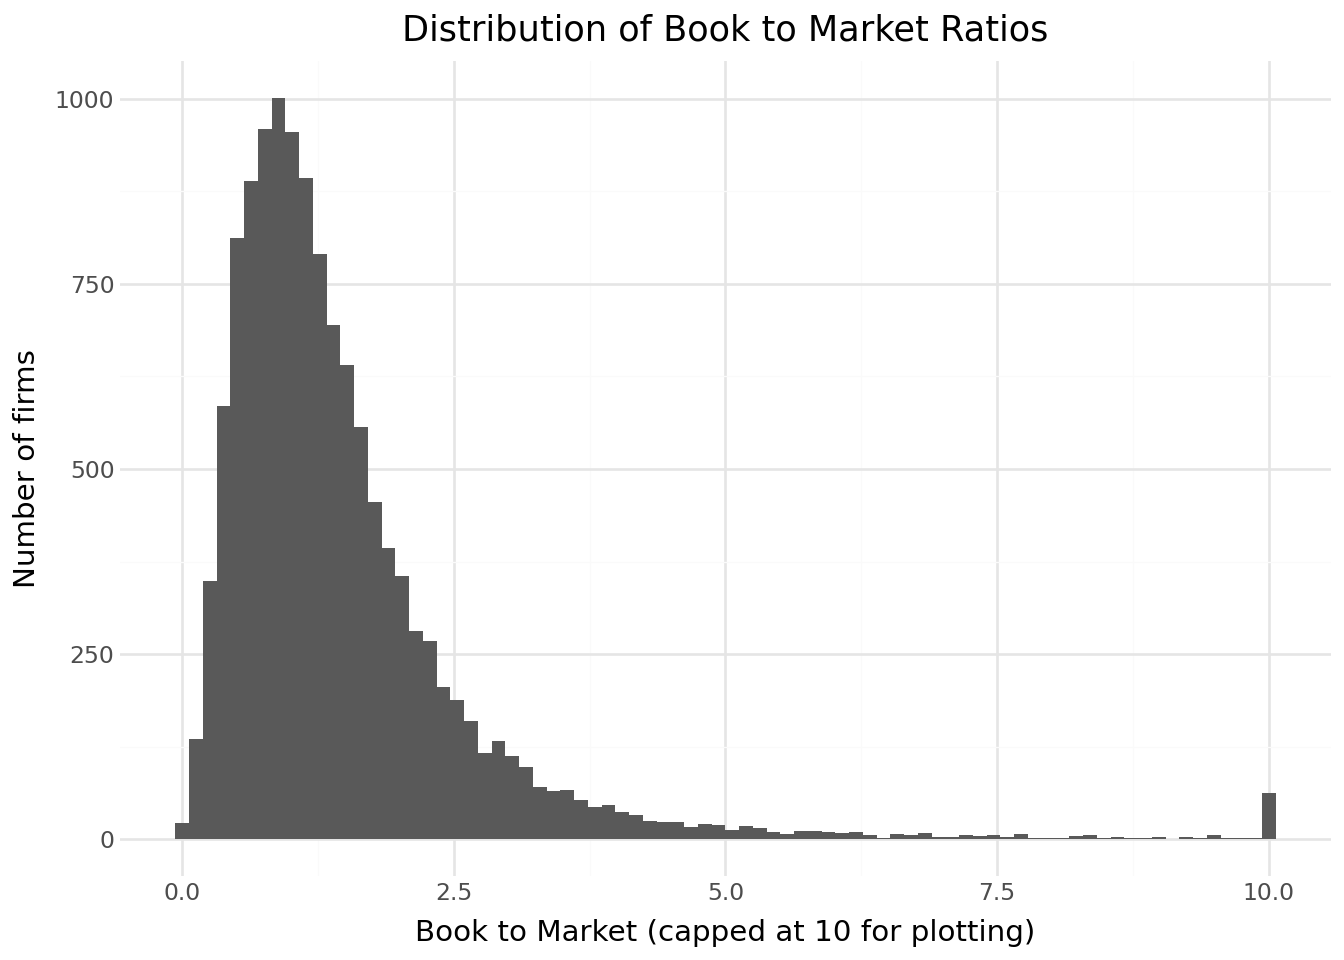

In [33]:
from plotnine import *
import numpy as np

bm_plot_data = (
    merged_data[["bm"]]
      .dropna()
      .assign(bm_plot=lambda x: x["bm"].clip(upper=10))
)

(
    ggplot(bm_plot_data, aes(x="bm_plot")) +
    geom_histogram(bins=80) +
    labs(
        title="Distribution of Book to Market Ratios",
        x="Book to Market (capped at 10 for plotting)",
        y="Number of firms"
    ) +
    theme_minimal()
)

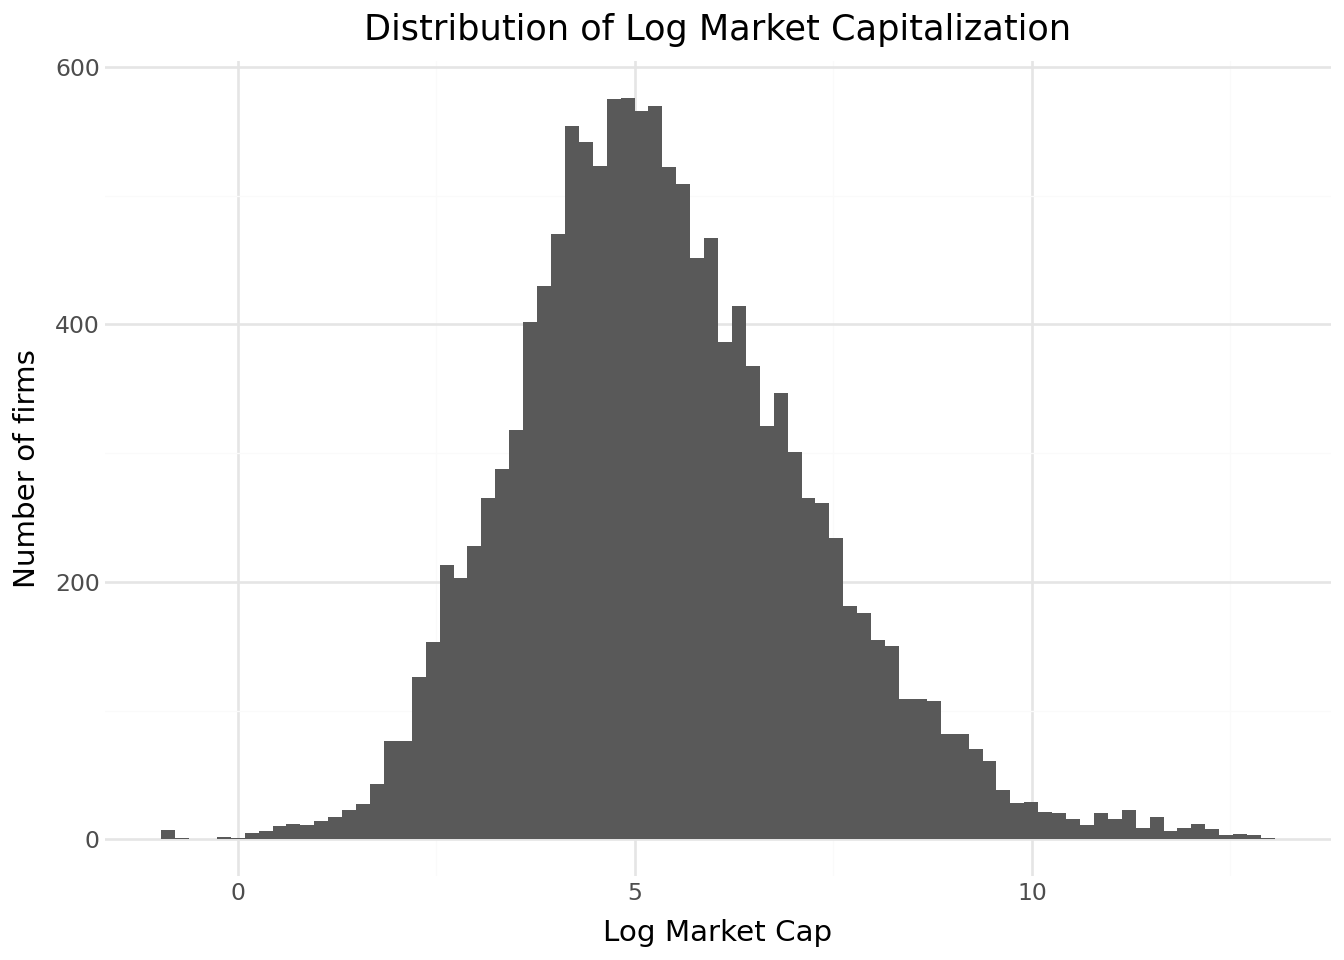

In [34]:
size_plot_data = (
    merged_data[["mktcap_lag"]]
      .dropna()
      .assign(log_size=lambda x: np.log(x["mktcap_lag"]))
)

(
    ggplot(size_plot_data, aes(x="log_size")) +
    geom_histogram(bins=80) +
    labs(
        title="Distribution of Log Market Capitalization",
        x="Log Market Cap",
        y="Number of firms"
    ) +
    theme_minimal()
)

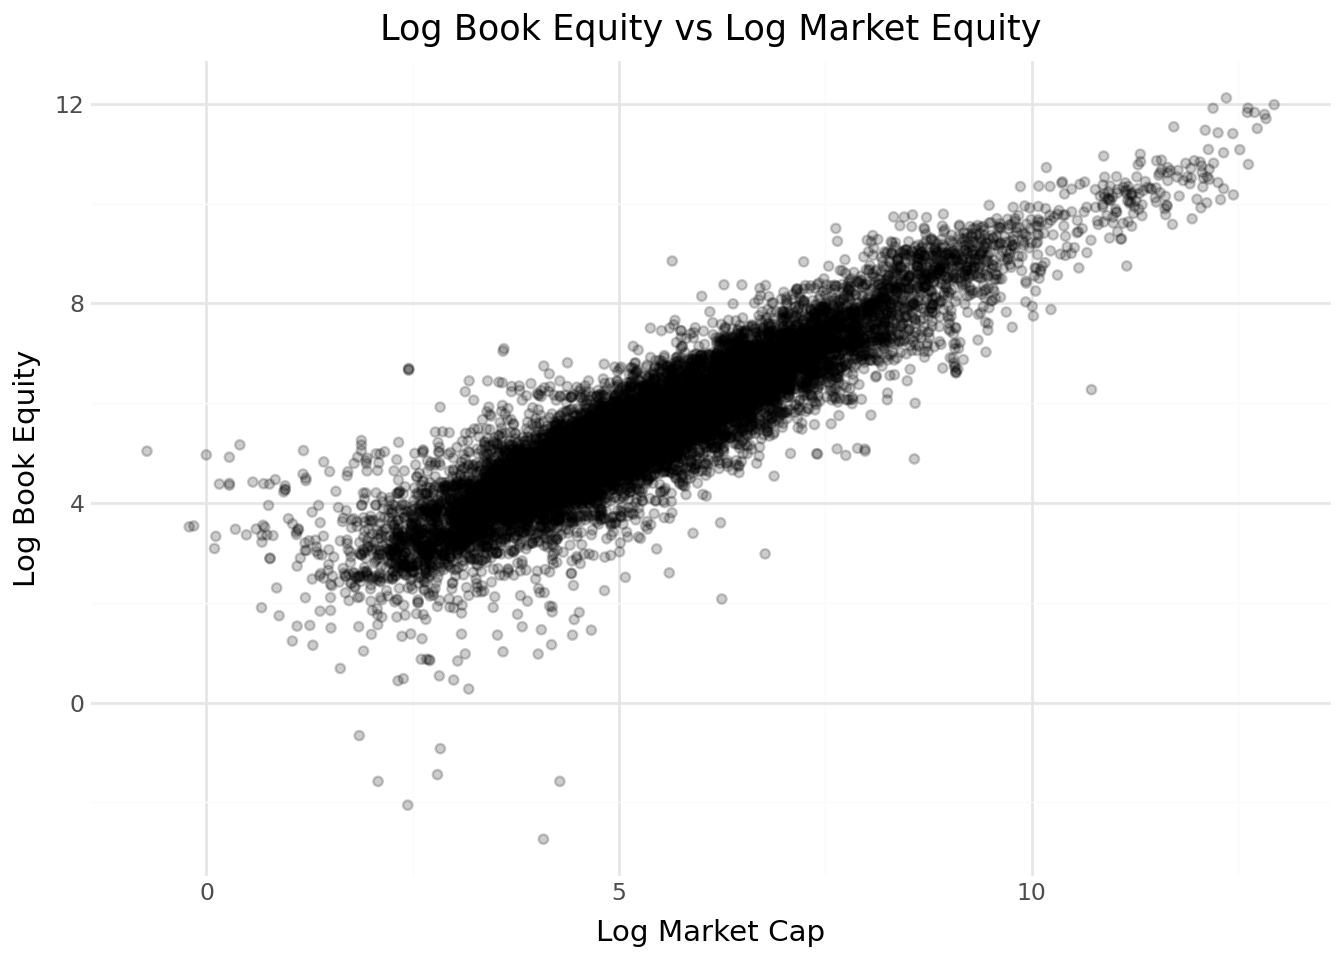

In [35]:
scatter_data = (
    merged_data[["be", "mktcap_lag"]]
      .dropna()
      .assign(
          log_be=lambda x: np.log(x["be"]),
          log_me=lambda x: np.log(x["mktcap_lag"])
      )
)

(
    ggplot(scatter_data, aes(x="log_me", y="log_be")) +
    geom_point(alpha=0.2) +
    labs(
        title="Log Book Equity vs Log Market Equity",
        x="Log Market Cap",
        y="Log Book Equity"
    ) +
    theme_minimal()
)